# Summary Statistics of Yearly Aggregated Data

<a id='top'></a>

<a href=#readdata>Read Data</a>  

<a href=#summary>Summary Statistics</a>

<a href=#end>End</a>


In [1]:
# Ignore 'dask' warning

import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

<a id='readdata'></a>

# Read in Yearly data
<a href=#top>Top</a>

In [2]:
# Setting up constants. All required
project = 'graydon-moving-indicator'
bucket_name = 'graydon-data'

# Initializing bucket
fs = gcsfs.GCSFileSystem(project='graydon-moving-indicator')
gcs = storage.Client()
bucket = gcs.get_bucket(bucket_name)


# Setting up dictionary of column types
dtype={ 'id_company'  :np.float64,
        'id_branch'    :np.int64, 
        'code_sbi_2'         : np.float64, 
        'code_sbi_1'          :object, 
        'has_relocated':bool,
        'has_relocated_next_year ' : bool,
        'qty_address_mutations_total' :np.float64,
        #'has_name_change'  :bool,
        'ratio_operating_result_consolidated_operating_result': np.float64,
        'ratio_revenue_consolidated_revenue': np.float64,
        'qty_green_flags'   :np.float64,
        'qty_orange_flags'   :np.float64,
        'qty_red_flags'   :np.float64,
        'A'   :np.float64,
        'AA'   :np.float64,
        'AAA'   :np.float64,
        'B'   :np.float64,
        'BB'   :np.float64,
        'BBB'   :np.float64,
        'C'   :np.float64,
        'CC'   :np.float64,
        'CCC'   :np.float64,
        'D'   :np.float64,
        'NR'   :np.float64,
        'company_age'   :np.float64,
        'years_since_last_amt_consolidated_operating_result'   :np.float64,
        'years_since_last_amt_consolidated_revenue'   :np.float64,
        'years_since_last_amt_operating_result'   :np.float64,
        'years_since_last_qty_employees'   :np.float64,
        'years_since_last_amt_revenue'   :np.float64,
        'delta_qty_employees'   :np.float64,
        'delta_qty_issued_credit_reports'   :np.float64,
        'delta_score_payment_assessment'   :np.float64,
        'delta_score_payment_assessment'   :np.float64,
        'code_legal_form_has_changed ' : bool,
        'is_discontinued_any ' : bool,
        'has_financial_calamity ' : bool,
        'mean_amt_consolidated_operating_result'   :np.float64,
        'mean_amt_consolidated_revenue'   :np.float64,
        'mean_amt_operating_result'   :np.float64,
        'mean_amt_revenue'   :np.float64,
        'mean_qty_employees'   :np.float64,
        'mean_qty_issued_credit_reports'   :np.float64,
        'mean_score_payment_assessment'   :np.float64,
        'mean_score_pd'   :np.float64,
        'qty_address_mutations_year'   :np.float64,
        'qty_started_names_year'   :np.float64,
        'qty_stopped_names_year'   :np.float64,
        'qty_board_changes_year'   :np.float64,
        'variance_qty_issued_credit_reports'   :np.float64,
        'variance_score_payment_assessment'   :np.float64,
        'variance_score_pd'   :np.float64,
        #'variance_qty_employees'   :np.float64
      }


# Setting up dictionary of column types
parse_dates= ['date_month', 'date_relocation_last', 'date_relocation_penultimate']

def read_one_year_from_bucket_merged_csv(year, dir_prefix = ''):
    """ Reads a whole year of data from the already merged files """
    full_year_df = pd.DataFrame()
    print('Starting with year: ', year)
    print(dir_prefix)
    blob_list = list(bucket.list_blobs(prefix=dir_prefix))    
    for blob in blob_list:  
        print("blob", blob.name)
        if year in blob.name:
            print('Processing file: ', blob.name)
            with fs.open('graydon-data/' + blob.name) as f:
                full_year_df = pd.read_csv(f, sep=',', index_col=0, dtype=dtype, parse_dates=parse_dates)   
        print('The number of rows so far is: ', full_year_df.shape[0])
    return full_year_df



In [3]:
data_df = read_one_year_from_bucket_merged_csv(
    dir_prefix= 'including_scores/merged_per_year/aggregated'
                                                   , year = '2017')

Starting with year:  2017
including_scores/merged_per_year/aggregated
blob including_scores/merged_per_year/aggregated/
The number of rows so far is:  0
blob including_scores/merged_per_year/aggregated/2017_merged_cleaned.csv
Processing file:  including_scores/merged_per_year/aggregated/2017_merged_cleaned.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The number of rows so far is:  1965800


In [8]:
data_df.shape

(1965800, 54)

In [6]:
data_df.columns

Index(['id_branch', 'date_month', 'id_company', 'code_sbi_2', 'code_sbi_1',
       'qty_address_mutations_total', 'has_relocated', 'has_name_change',
       'date_relocation_last', 'date_relocation_penultimate',
       'ratio_operating_result_consolidated_operating_result',
       'ratio_revenue_consolidated_revenue', 'qty_green_flags',
       'qty_orange_flags', 'qty_red_flags', 'A', 'AA', 'AAA', 'B', 'BB', 'BBB',
       'C', 'CC', 'CCC', 'D', 'NR', 'company_age',
       'years_since_last_amt_consolidated_operating_result',
       'years_since_last_amt_consolidated_revenue',
       'years_since_last_amt_operating_result',
       'years_since_last_qty_employees', 'years_since_last_amt_revenue',
       'delta_qty_employees', 'delta_qty_issued_credit_reports',
       'delta_score_payment_assessment', 'code_legal_form_has_changed',
       'is_discontinued_any', 'has_financial_calamity',
       'mean_amt_consolidated_operating_result',
       'mean_amt_consolidated_revenue', 'mean_amt_oper

<a id='summary'></a>
# Summary Statistics

<a href=#top>Top</a>

### Overall probability of moving:

In [9]:
data_df.has_relocated_next_year.value_counts()

False    1800347
True       91577
Name: has_relocated_next_year, dtype: int64

In [10]:
data_df.has_relocated_next_year.value_counts() / data_df.shape[0]

False    0.915834
True     0.046585
Name: has_relocated_next_year, dtype: float64

In [11]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

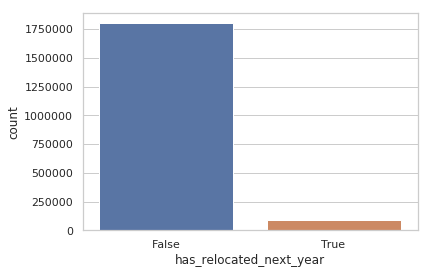

In [13]:
sns.countplot(x='has_relocated_next_year', data=data_df)
plt.show()

#### Overall Summary

In [15]:
data_df.describe()

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,id_branch,id_company,code_sbi_2,qty_address_mutations_total,ratio_operating_result_consolidated_operating_result,ratio_revenue_consolidated_revenue,qty_green_flags,qty_orange_flags,qty_red_flags,A,...,mean_qty_issued_credit_reports,mean_score_payment_assessment,mean_score_pd,qty_address_mutations_year,qty_started_names_year,qty_stopped_names_year,qty_board_changes_year,variance_qty_issued_credit_reports,variance_score_payment_assessment,variance_score_pd
count,1.965800e+06,1.965800e+06,1.965800e+06,1.965800e+06,1.918740e+05,9.573700e+04,1.965800e+06,1.965800e+06,1.965800e+06,1.965800e+06,...,1.965800e+06,1.965800e+06,1.965800e+06,1.965800e+06,1.965800e+06,1.965800e+06,1.965800e+06,1.952605e+06,1.965800e+06,1.965800e+06
mean,3.951761e+07,7.722977e+08,6.537138e+01,1.149003e-01,NaN,inf,6.816827e+00,1.983676e-01,4.547407e+00,1.477067e+00,...,9.420857e-02,2.364193e+01,-3.451369e+00,9.490996e-02,2.243412e-02,2.340014e-05,2.478823e-01,9.632300e-02,2.748526e+02,-3.979252e+01
std,1.991546e+07,3.336720e+08,2.179431e+01,5.198005e+00,NaN,NaN,5.649231e+00,1.196201e+00,6.673493e+00,3.531004e+00,...,3.436700e-01,6.165401e+00,2.429105e+00,3.177478e-01,2.743148e-01,2.139693e-02,1.526169e+00,4.132810e-01,8.067819e+01,2.897239e+01
min,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-5.973000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.720900e+01
25%,2.481688e+07,8.964896e+08,5.600000e+01,0.000000e+00,3.399156e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,-5.169000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+02,-6.148100e+01
50%,4.107903e+07,9.112649e+08,6.400000e+01,0.000000e+00,inf,NaN,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.800000e+01,-4.962083e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.880000e+02,-5.898800e+01
75%,5.714363e+07,9.278015e+08,8.500000e+01,0.000000e+00,inf,NaN,1.200000e+01,0.000000e+00,1.200000e+01,0.000000e+00,...,0.000000e+00,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.360000e+02,0.000000e+00
max,7.262735e+07,9.410078e+08,9.900000e+01,9.300000e+02,inf,inf,1.300000e+01,1.300000e+01,4.906000e+03,1.190000e+02,...,1.833333e+01,2.900000e+01,2.979167e-01,7.000000e+00,2.400000e+01,2.800000e+01,1.510000e+02,1.010000e+02,3.770000e+02,3.575000e+00


### Subset for companies with number of employees > 50

In [17]:
mult_companies = data_df[data_df['mean_qty_employees']>50]

In [18]:
mult_companies.shape

(78335, 54)

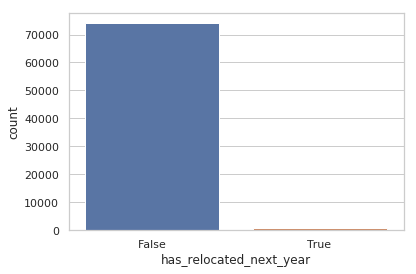

In [19]:
sns.countplot(x='has_relocated_next_year', data=mult_companies)
plt.show()

Text(0, 0.5, 'Frequency')

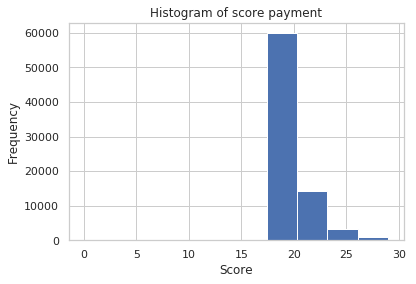

In [21]:
mult_companies.mean_score_payment_assessment.hist()
plt.title('Histogram of score payment')
plt.xlabel('Score')
plt.ylabel('Frequency')

### Inspect Histograms simultaneously

Define columns to view:

In [22]:
feature_cols = ['mean_score_pd', 'mean_score_payment_assessment', 'code_sbi_2']

In [23]:
subset_data = mult_companies[feature_cols]

mean_score_pd
mean_score_payment_assessment
code_sbi_2


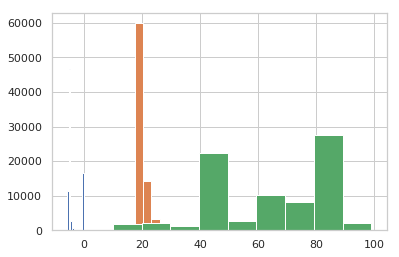

In [24]:
for cols in feature_cols:
    print(cols)
    mult_companies[cols].hist()
#     plt.title('Histogram of', cols)
#     plt.xlabel(cols)
#     plt.ylabel('Frequency')

In [25]:
mult_companies.dtypes

id_branch                                                        int64
date_month                                              datetime64[ns]
id_company                                                     float64
code_sbi_2                                                     float64
code_sbi_1                                                      object
qty_address_mutations_total                                    float64
has_relocated                                                     bool
has_name_change                                                   bool
date_relocation_last                                    datetime64[ns]
date_relocation_penultimate                             datetime64[ns]
ratio_operating_result_consolidated_operating_result           float64
ratio_revenue_consolidated_revenue                             float64
qty_green_flags                                                float64
qty_orange_flags                                               float64
qty_re

In [30]:
feature_cols = ['mean_score_pd', 'mean_score_payment_assessment', 'code_sbi_2', 
                'mean_qty_employees', 'qty_address_mutations_year']

### Remove qty_address_mutations_total

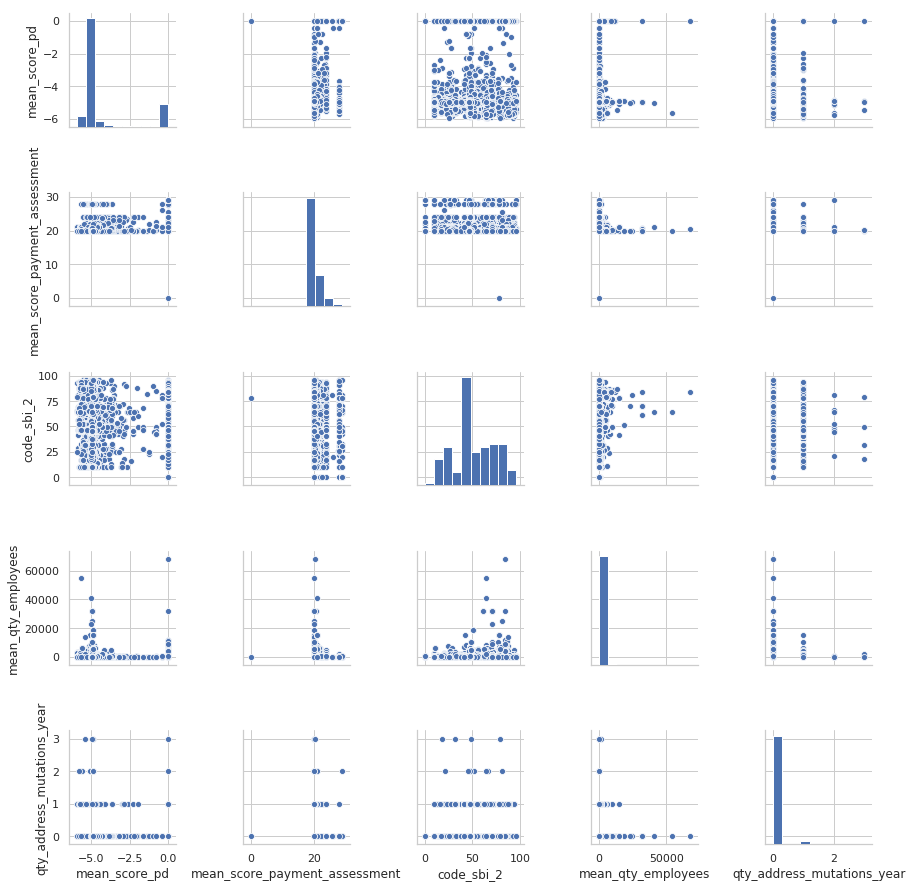

In [31]:
g = sns.pairplot(mult_companies[:10000], vars=feature_cols)

### Select companies with < 10000 employees

<a href=#top>Top</a>

In [32]:
subset_large_companies = mult_companies.loc[mult_companies.mean_qty_employees < 10000]

In [33]:
subset_large_companies['mean_qty_employees'].describe()

count    74624.00000
mean      1055.22325
std       1630.09860
min         50.20000
25%        120.00000
50%        350.00000
75%       1200.00000
max       9721.00000
Name: mean_qty_employees, dtype: float64

In [35]:
subset_large_companies['delta_qty_employees'].describe()

count    74624.000000
mean         4.953808
std        130.500156
min      -2650.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5000.000000
Name: delta_qty_employees, dtype: float64

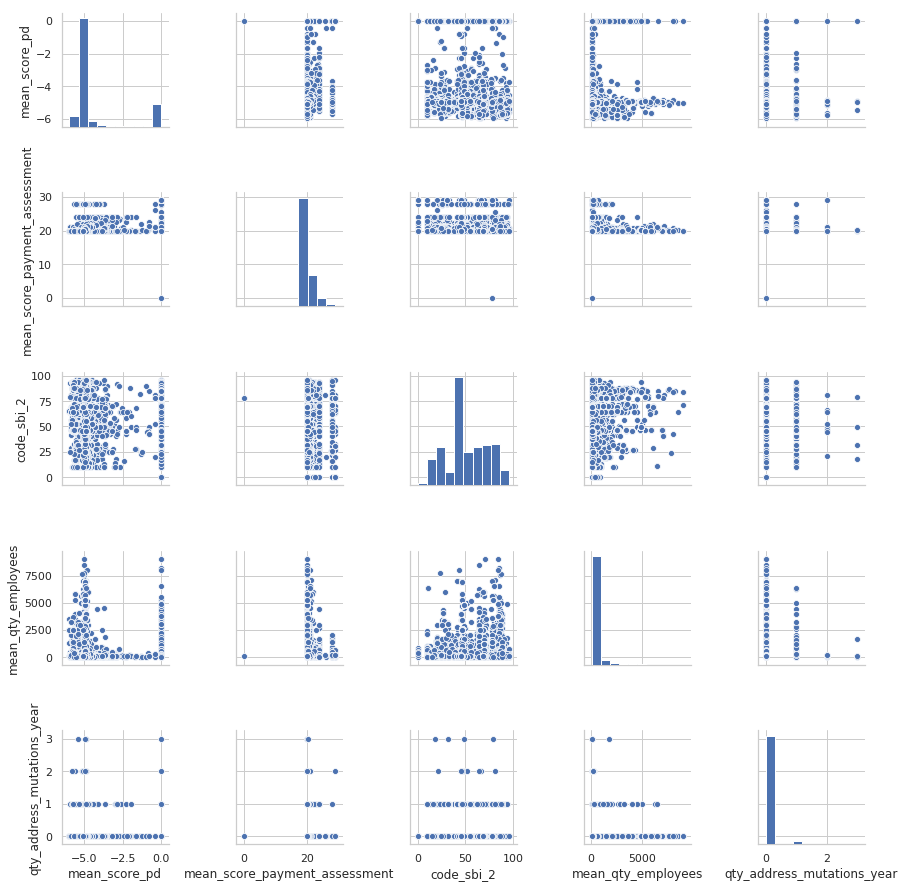

In [36]:
g = sns.pairplot(subset_large_companies[:10000], vars=feature_cols)

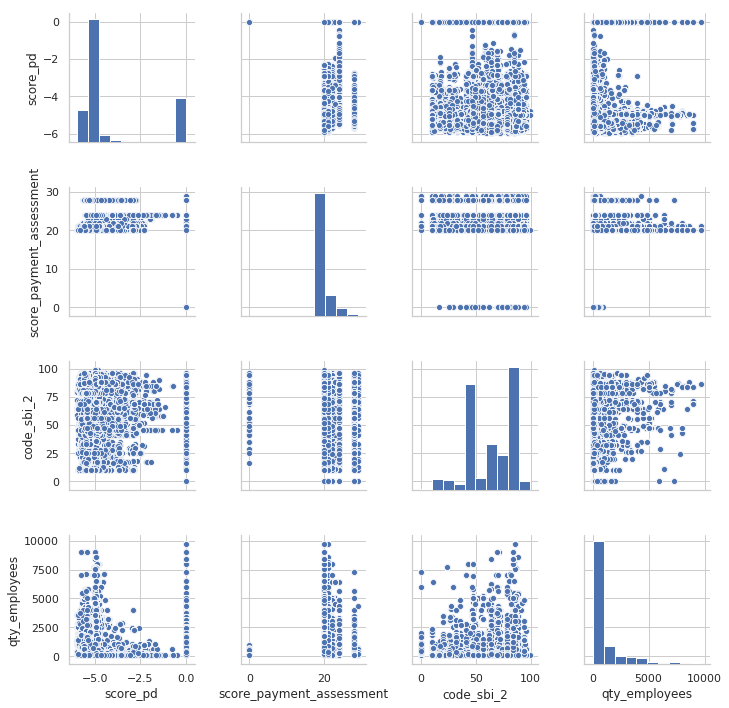

In [43]:
g = sns.pairplot(subset_large_companies, vars=feature_cols)

In [37]:
subset_large_companies.shape

(74624, 54)

In [38]:
subset_large_companies['has_relocated_next_year'].value_counts() / subset_large_companies.shape[0]

False    0.946773
True     0.012824
Name: has_relocated_next_year, dtype: float64

### Some other Summary Stats:


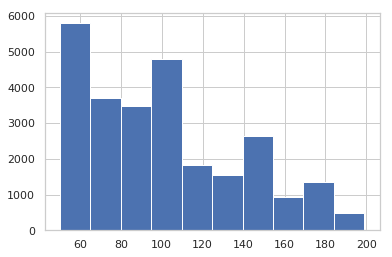

In [41]:
mult_companies.loc[(mult_companies.mean_qty_employees>10) & (mult_companies.mean_qty_employees<200)]['mean_qty_employees'].hist()

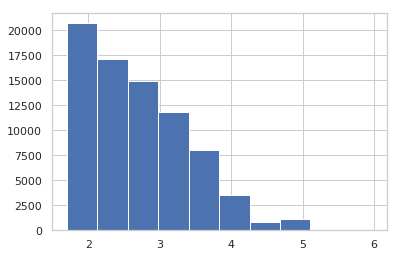

In [42]:
np.log10(mult_companies['mean_qty_employees']).hist()

<a id='end'></a>

<a href=#top>Top</a>

# End